<a href="https://colab.research.google.com/github/doblepensador/Tests/blob/master/Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
noise = np.random.rand(100, 1)
X = sorted(10*np.random.rand(100,1)) + noise
y = sorted(10*np.random.rand(100)) # An array with 100 values

# np.random.rand(3,2)
# array([[ 0.14022471,  0.96360618],  
#        [ 0.37601032,  0.25528411],  
#        [ 0.49313049,  0.94909878]]) 

plt.scatter(X, y)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
print("W of Linear Regression: {}".format(model.coef_))
print("B of Linear Regression: {}".format(model.intercept_))

W of Linear Regression: [0.93296862]
B of Linear Regression: -0.6733213483274598


In [ ]:
print("Score of Linear Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of Linear Regression for the test set: {}".format(model.score(X_test, y_test)))

Score of Linear Regression for the train set: 0.9709310478763848
Score of Linear Regression for the test set: 0.9828345385008722


In [ ]:
predict = model.predict(X_test)
plt.scatter(X, y, alpha= 0.1)
plt.plot(X_test, predict, '--r');

The house prices in Boston 

In [3]:
from sklearn.datasets import load_boston
import pandas as pd


In [ ]:
boston = load_boston()
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_df['MEDV'] = boston.target
boston_df.head()


In [ ]:
boston_df.describe()

In [ ]:
for i, col in enumerate(boston_df.columns):
  plt.figure(figsize =(8,4))
  plt.plot(boston_df[col])
  plt.title(col)
  plt.xlabel('Town')
  plt.tight_layout()

In [ ]:
for i, col in enumerate(boston_df.columns):
  plt.figure(figsize =(8,4))
  plt.scatter(boston_df[col], boston_df['MEDV'])
  plt.ylabel('MEDV')
  plt.xlabel(col)
  plt.tight_layout()

In [4]:
import seaborn as sns


In [ ]:
sns.pairplot(boston_df)

In [5]:
from sklearn.preprocessing import StandardScaler


In [ ]:
X=boston_df.drop("MEDV", axis=1).copy()
y=boston_df["MEDV"].copy()

scaler = StandardScaler()
scaler.fit(X)
scaled = scaler.transform(X)
# 이 때 transform( ) 결과는 ndarray이므로 다시 DataFrame으로 반환하기.
scaled_boston = pd.DataFrame(scaled, columns=boston.feature_names)

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)
print("Score of Linear Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of Linear Regression for the test set: {}".format(model.score(X_test, y_test)))

Score of Linear Regression for the train set: 0.7508856358979672
Score of Linear Regression for the test set: 0.668759493535633


In [6]:
from sklearn.model_selection import cross_val_score


In [ ]:

scores = cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error')
print("NMSE score: {}".format(scores))
print("NMSE score mean: {}".format(scores.mean()))
print("NMSE score std: {}".format(scores.std()))

In [ ]:
r2_scores = cross_val_score(model, X, y, cv=10, scoring='r2')
print("r2 score: {}".format(r2_scores))
print("r2 score mean: {}".format(r2_scores.mean()))
print("r2 score std: {}".format(r2_scores.std()))

In [ ]:
print("y= " + str(model.intercept_)+ " ")
for i, c in enumerate(model.coef_):
  print(str(c) + "*x" + str(i))

In [7]:
from sklearn.metrics import mean_squared_error, r2_score


In [ ]:
predict = model.predict(X_train)
rmse = np.sqrt(mean_squared_error(y_train, predict))
r2 = r2_score(y_train, predict)

print("RMSE: {}".format(rmse))
print("R square: {}".format(r2))

In [ ]:
predict = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, predict))
r2 = r2_score(y_test, predict)

print("RMSE: {}".format(rmse))
print("R square: {}".format(r2))

RMSE: 4.928602182665329
R square: 0.668759493535633


In [ ]:
def plot_house_price(actual_price, predicted):
  plt.figure(figsize=(8,4))
  plt.scatter(actual_price, predicted)
  plt.plot([5, 50], [5,50], '--r')
  plt.xlabel("True price ($1,000s)")
  plt.ylabel("Predicted price ($1,000s)")
  plt.tight_layout()

In [ ]:
predicted = model.predict(X_test)
expected = y_test
plot_house_price(expected, predicted)

California Houses' Price

In [ ]:
from sklearn.datasets import fetch_california_housing

In [ ]:
california = fetch_california_housing()
print(california.keys())
print(california.DESCR)

In [ ]:
california_df = pd.DataFrame(california.data, columns = california.feature_names)
california_df["Target"] = california.target
california_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Dealing with location information

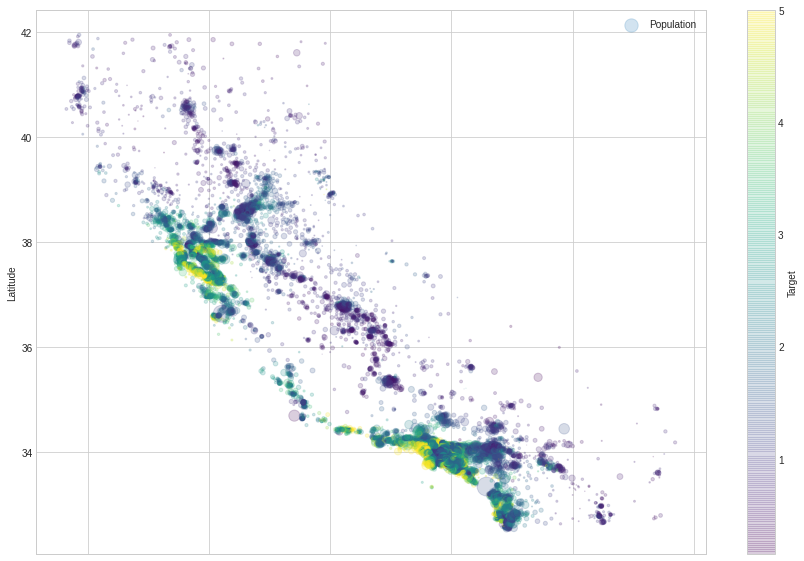

In [ ]:
california_df.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.2, s=california_df['Population']/100,
                   label = 'Population', figsize=(15,10), c='Target', cmap=plt.get_cmap('viridis'), colorbar=True);

**Ridge/Lasso/Elastic-Net Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split


In [8]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
model = Ridge(alpha=0.4)
model.fit(X_train, y_train)
print("Score of Ridge Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of Ridge Regression for the test set: {}".format(model.score(X_test, y_test)))
#Grid Search 이용해서 최적값을 구한다. 

Score of Ridge Regression for the train set: 0.74416655644575
Score of Ridge Regression for the test set: 0.6901040450659762


In [ ]:
from sklearn.linear_model import Lasso


In [ ]:
model = Lasso(alpha=0.001)
model.fit(X_train, y_train)
print("Score of Lasso Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of Lasso Regression for the test set: {}".format(model.score(X_test, y_test)))

Score of Lasso Regression for the train set: 0.7449635721750856
Score of Lasso Regression for the test set: 0.6879154123031891


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
model = ElasticNet(alpha=0.01, l1_ratio=0.5)
model.fit(X_train, y_train)
print("Score of EN Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of EN Regression for the test set: {}".format(model.score(X_test, y_test)))

Score of EN Regression for the train set: 0.7397863258218544
Score of EN Regression for the test set: 0.6899004660808394


In [ ]:
predicted = model.predict(X_test)
actual_price = y_test

plot_house_price(actual_price, predicted)

In [ ]:
from sklearn.linear_model import OrthogonalMatchingPursuit
# 0이 아닌 W값이 K개 이하로 제한을 거는 것. 
# MSE의 값을 Toll 이하로 제한을 거는 것. 

In [ ]:
model = OrthogonalMatchingPursuit(n_nonzero_coefs=7)
model.fit(X_train, y_train)


In [ ]:
print("Score of OrthogonalMatchingPursuit Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of OrthogonalMatchingPursuit Regression for the test set: {}".format(model.score(X_test, y_test)))

Score of OrthogonalMatchingPursuit Regression for the train set: 0.7235016634688094
Score of OrthogonalMatchingPursuit Regression for the test set: 0.6836655139312324


In [ ]:
predicted = model.predict(X_test)
actual_price = y_test

plot_house_price(actual_price, predicted)

In [ ]:
model = OrthogonalMatchingPursuit(tol=1.)
model.fit(X_train, y_train)

In [ ]:
print("Score of OrthogonalMatchingPursuit Regression for the train set: {}".format(model.score(X_train, y_train)))
print("Score of OrthogonalMatchingPursuit Regression for the test set: {}".format(model.score(X_test, y_test)))

Score of OrthogonalMatchingPursuit Regression for the train set: 0.7449674831719828
Score of OrthogonalMatchingPursuit Regression for the test set: 0.6875512566488042


In [ ]:
predicted = model.predict(X_test)
actual_price = y_test

plot_house_price(actual_price, predicted)

**Polynomial Linear Regression** 
The coefficients are all linear. This is a standard linear model

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
 

In [ ]:
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=123)

In [ ]:
model = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    LinearRegression()
)
# Pipeline을 만들어서, polynomialfeatures, standardscaler, linearregression을 차례대로 수행. 

model.fit(X_train, y_train)
print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.9346787783950696
Score for the test set: 0.825786471800239


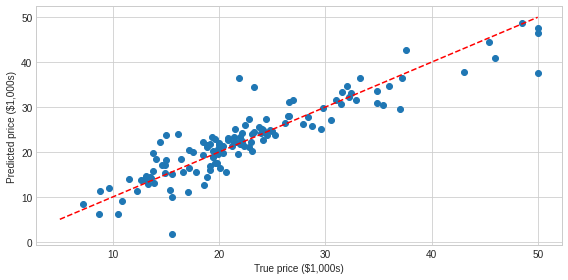

In [ ]:
predicted = model.predict(X_test)
actual_price = y_test

plot_house_price(actual_price, predicted)

# Stochastic Gradient Descent Regressor

In [10]:
from sklearn.linear_model import SGDRegressor
# X, y = load_boston(return_X_y=True)
# X_train, X_test, y_train, y_test = train_test_split(X,y)

In [14]:
model = make_pipeline(StandardScaler(), SGDRegressor(loss='squared_error'))
model.fit(X_train, y_train)
print("Score for the train set: {}".format(model.score(X_train, y_train)))
print("Score for the test set: {}".format(model.score(X_test, y_test)))

Score for the train set: 0.7298925421445646
Score for the test set: 0.7558220071067888
